# Peters Analysis

In my portion of the analysis, I will be doing a random forest model to try and predict survival rate on the titanic.

In [2]:
import pandas as pd

titanic = pd.read_csv("titanic_augmented.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187,4


# Data Wrangling for Classification Trees

In [3]:
print("Dataset shape:", titanic.shape)
print("\nColumn data types:")
print(titanic.dtypes)
print("\nMissing values:")
print(titanic.isnull().sum())
print("\nBasic statistics:")
titanic.describe()

Dataset shape: (891, 26)

Column data types:
PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                  float64
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Cabin                 object
Embarked              object
name_length            int64
title                 object
title_group           object
family_size            int64
is_alone               int64
ticket_group_size      int64
fare_per_person      float64
age_fare_ratio       float64
cabin_deck            object
cabin_room_number    float64
booking_reference      int64
service_id             int64
cabin_score          float64
name_word_count        int64
dtype: object

Missing values:
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp               

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,name_length,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,200.00000,8.910000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,26.965208,1.904602,0.602694,1.787879,17.789001,1.572536,50.49000,5.108118e+07,536369.988777,4.956762,4.067340
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,9.281607,1.613459,0.489615,1.361142,21.218127,1.661773,35.39497,2.838174e+07,261551.630299,2.915177,1.168866
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,9.249000e+04,102869.000000,0.046320,3.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000,1.000000,0.000000,1.000000,7.762500,0.116026,22.00000,2.831962e+07,299638.000000,2.325861,3.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,25.000000,1.000000,1.000000,1.000000,8.850000,1.175795,43.00000,5.128853e+07,535564.000000,4.954913,4.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000,2.000000,1.000000,2.000000,24.288000,2.543045,77.25000,7.493131e+07,757663.000000,7.479345,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000,11.000000,1.000000,7.000000,221.779000,9.779559,148.00000,9.997588e+07,999684.000000,9.997177,14.000000


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create a copy for wrangling
df = titanic.copy()

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Remove Cabin columns as there are too many unknowns and it may not add significant value
df.drop(columns=['Cabin', 'cabin_room_number', 'title'], inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
name_length          0
title_group          0
family_size          0
is_alone             0
ticket_group_size    0
fare_per_person      0
age_fare_ratio       0
cabin_deck           0
booking_reference    0
service_id           0
cabin_score          0
name_word_count      0
dtype: int64


C:\Users\austi\AppData\Local\Temp\ipykernel_5788\4112954337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\austi\AppData\Local\Temp\ipykernel_5788\4112954337.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
# Encode categorical variables using label encoding (optimal for Random Forest)
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Binary encoding for Sex
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 1, 'female': 0})

# Drop PassengerId, Name, and Ticket (not useful for prediction)
df_encoded.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Label encode Embarked (S=0, C=1, Q=2)
le_embarked = LabelEncoder()
df_encoded['Embarked'] = le_embarked.fit_transform(df_encoded['Embarked'])

# Label encode title_group
le_title = LabelEncoder()
df_encoded['title_group'] = le_title.fit_transform(df_encoded['title_group'])

# Label encode cabin_deck
le_cabin = LabelEncoder()
df_encoded['cabin_deck'] = le_cabin.fit_transform(df_encoded['cabin_deck'])

# Pclass is already numeric (1, 2, 3), keep as is

print("Data shape after encoding:", df_encoded.shape)
print("\nColumn data types after encoding:")
print(df_encoded.dtypes)
print("\nSample of encoded data:")
print(df_encoded.head())

Data shape after encoding: (891, 20)

Column data types after encoding:
Survived               int64
Pclass                 int64
Sex                    int64
Age                  float64
SibSp                  int64
Parch                  int64
Fare                 float64
Embarked               int64
name_length            int64
title_group            int64
family_size            int64
is_alone               int64
ticket_group_size      int64
fare_per_person      float64
age_fare_ratio       float64
cabin_deck             int64
booking_reference      int64
service_id             int64
cabin_score          float64
name_word_count        int64
dtype: object

Sample of encoded data:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  name_length  \
0         0       3    1  22.0      1      0   7.2500         2           23   
1         1       1    0  38.0      1      0  71.2833         0           51   
2         1       3    0  26.0      0      0   7.9250         2      

In [7]:
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nClass distribution:")
print(y.value_counts())

Features shape: (891, 19)
Target shape: (891,)

Class distribution:
Survived
0    549
1    342
Name: count, dtype: int64


In [8]:
# Train-test split (no scaling needed for Random Forest!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeature names:")
print(X.columns.tolist())
print("\nFeature count:", len(X.columns))

Training set shape: (668, 19)
Test set shape: (223, 19)

Feature names:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'name_length', 'title_group', 'family_size', 'is_alone', 'ticket_group_size', 'fare_per_person', 'age_fare_ratio', 'cabin_deck', 'booking_reference', 'service_id', 'cabin_score', 'name_word_count']

Feature count: 19


# Analysis for Classification Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Classification Tree (Decision Tree)
print("="*60)
print("1. DECISION TREE CLASSIFIER")
print("="*60)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=10)
dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))

1. DECISION TREE CLASSIFIER
Training Accuracy: 0.8623
Test Accuracy: 0.7489
Precision: 0.6897
Recall: 0.6742
F1-Score: 0.6818

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       134
           1       0.69      0.67      0.68        89

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



In [10]:
# 2. Random Forest Classifier
print("\n" + "="*60)
print("2. RANDOM FOREST CLASSIFIER")
print("="*60)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=20, 
                                  min_samples_leaf=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))


2. RANDOM FOREST CLASSIFIER
Training Accuracy: 0.8728
Test Accuracy: 0.8206
Precision: 0.8101
Recall: 0.7191
F1-Score: 0.7619

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       134
           1       0.81      0.72      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [11]:
# 3. Gradient Boosting Classifier
print("\n" + "="*60)
print("3. GRADIENT BOOSTING CLASSIFIER")
print("="*60)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, 
                                      min_samples_split=20, min_samples_leaf=10, random_state=42)
gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_gb):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_gb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_gb))


3. GRADIENT BOOSTING CLASSIFIER


Training Accuracy: 0.9940
Test Accuracy: 0.8072
Precision: 0.7674
Recall: 0.7416
F1-Score: 0.7543

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       134
           1       0.77      0.74      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [12]:
# 4. Bagging Classifier (with Decision Tree as base estimator)
print("\n" + "="*60)
print("4. BAGGING CLASSIFIER")
print("="*60)

base_dt = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
bagging_model = BaggingClassifier(estimator=base_dt, n_estimators=100, random_state=42, n_jobs=-1)
bagging_model.fit(X_train, y_train)

y_train_pred_bag = bagging_model.predict(X_train)
y_test_pred_bag = bagging_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_bag):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_bag):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_bag):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_bag):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_bag):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_bag))


4. BAGGING CLASSIFIER
Training Accuracy: 0.8743
Test Accuracy: 0.8161
Precision: 0.8158
Recall: 0.6966
F1-Score: 0.7515

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       134
           1       0.82      0.70      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223



In [29]:
# ROC-AUC for Bagging Classifier
from sklearn.metrics import roc_auc_score

y_proba_bag = bagging_model.predict_proba(X_test)[:, 1]
roc_auc_bag = roc_auc_score(y_test, y_proba_bag)

print("\n" + "=" * 60)
print("BAGGING ROC-AUC")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_bag:.4f}")


BAGGING ROC-AUC
ROC-AUC: 0.8647


In [13]:
# Model Comparison Summary
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

models_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Bagging'],
    'Train Accuracy': [
        accuracy_score(y_train, y_train_pred_dt),
        accuracy_score(y_train, y_train_pred_rf),
        accuracy_score(y_train, y_train_pred_gb),
        accuracy_score(y_train, y_train_pred_bag)
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_gb),
        accuracy_score(y_test, y_test_pred_bag)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_rf),
        precision_score(y_test, y_test_pred_gb),
        precision_score(y_test, y_test_pred_bag)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_rf),
        recall_score(y_test, y_test_pred_gb),
        recall_score(y_test, y_test_pred_bag)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_rf),
        f1_score(y_test, y_test_pred_gb),
        f1_score(y_test, y_test_pred_bag)
    ]
})

print(models_comparison.to_string(index=False))

# Identify best model
best_idx = models_comparison['Test Accuracy'].idxmax()
best_model_name = models_comparison.loc[best_idx, 'Model']
print(f"\n✓ Best Model: {best_model_name} with Test Accuracy of {models_comparison.loc[best_idx, 'Test Accuracy']:.4f}")


MODEL COMPARISON SUMMARY
            Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
    Decision Tree        0.862275       0.748879   0.689655 0.674157  0.681818
    Random Forest        0.872754       0.820628   0.810127 0.719101  0.761905
Gradient Boosting        0.994012       0.807175   0.767442 0.741573  0.754286
          Bagging        0.874251       0.816143   0.815789 0.696629  0.751515

✓ Best Model: Random Forest with Test Accuracy of 0.8206


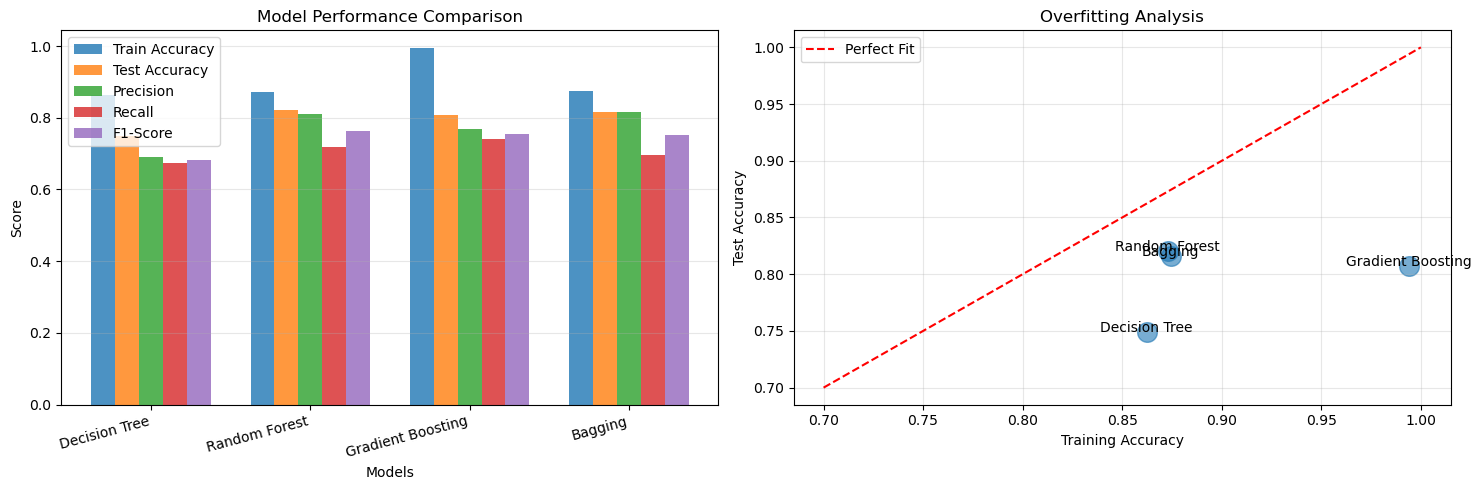

In [14]:
# Visualize Model Comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot comparison
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(models_comparison))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0].bar(x + i*width, models_comparison[metric], width, label=metric, alpha=0.8)

axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x + width * 2)
axes[0].set_xticklabels(models_comparison['Model'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')

# Train vs Test Accuracy
axes[1].scatter(models_comparison['Train Accuracy'], models_comparison['Test Accuracy'], s=200, alpha=0.6)
for idx, model in enumerate(models_comparison['Model']):
    axes[1].annotate(model, 
                    (models_comparison.loc[idx, 'Train Accuracy'], 
                     models_comparison.loc[idx, 'Test Accuracy']),
                    fontsize=10, ha='center')

axes[1].plot([0.7, 1.0], [0.7, 1.0], 'r--', label='Perfect Fit')
axes[1].set_xlabel('Training Accuracy')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_title('Overfitting Analysis')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

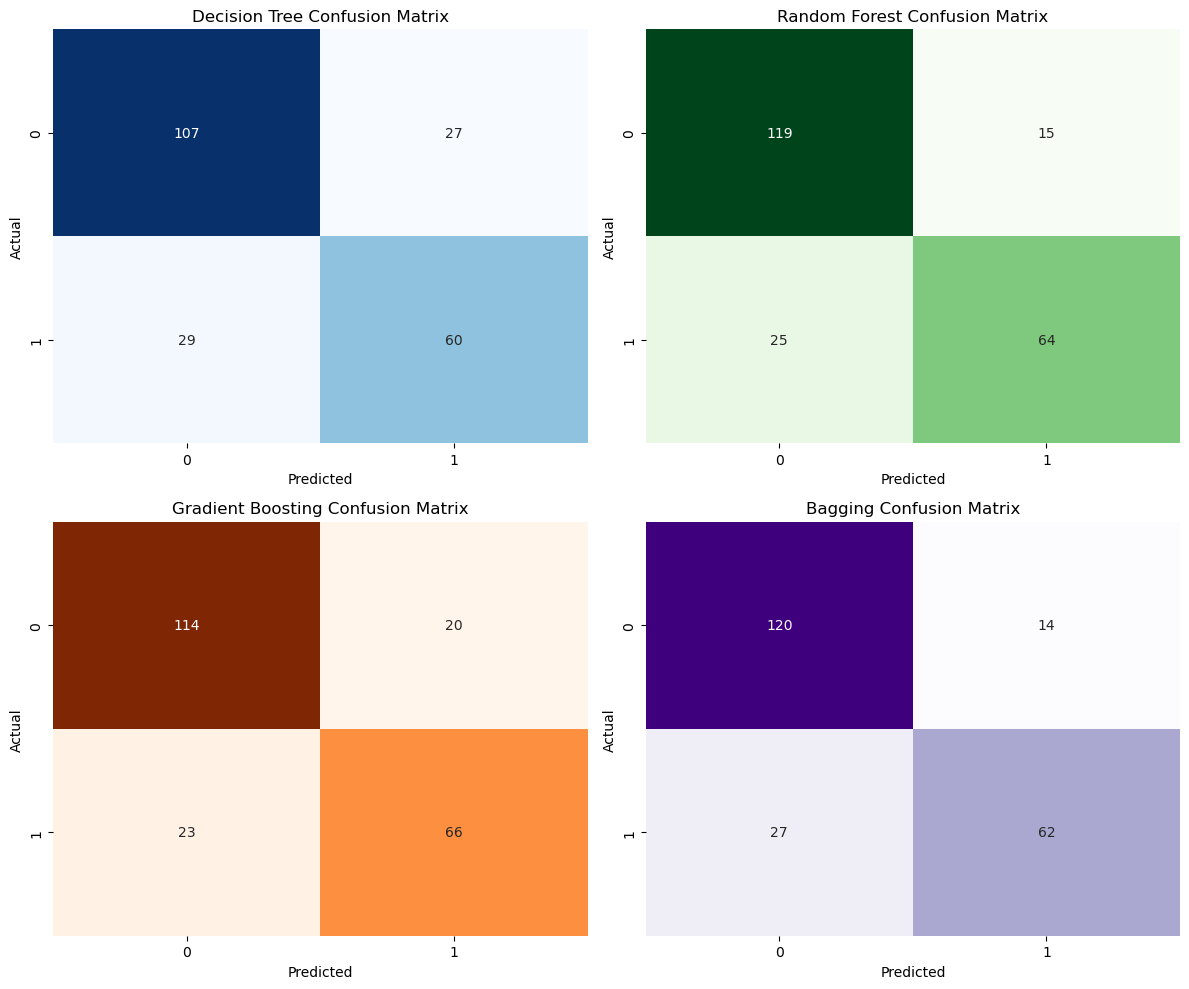

In [15]:
# Confusion Matrices for All Models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models_list = [
    ('Decision Tree', y_test_pred_dt),
    ('Random Forest', y_test_pred_rf),
    ('Gradient Boosting', y_test_pred_gb),
    ('Bagging', y_test_pred_bag)
]

cmaps = ['Blues', 'Greens', 'Oranges', 'Purples']

for idx, (model_name, predictions) in enumerate(models_list):
    row = idx // 2
    col = idx % 2
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmaps[idx], ax=axes[row, col], cbar=False)
    axes[row, col].set_title(f'{model_name} Confusion Matrix')
    axes[row, col].set_ylabel('Actual')
    axes[row, col].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Random Forest Optimization and Analysis

In [16]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score

print("="*60)
print("HYPERPARAMETER TUNING FOR RANDOM FOREST")
print("="*60)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Create Random Forest classifier
rf_tuning = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_tuning, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

print("\nPerforming Grid Search... This may take a few minutes.")
grid_search.fit(X_train, y_train)

print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train model with best parameters
best_rf_model = grid_search.best_estimator_

HYPERPARAMETER TUNING FOR RANDOM FOREST

Performing Grid Search... This may take a few minutes.
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

BEST PARAMETERS FOUND:
max_depth: None
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 10
n_estimators: 100

Best Cross-Validation Score: 0.8369


In [17]:
# Evaluate Optimized Random Forest
print("\n" + "="*60)
print("OPTIMIZED RANDOM FOREST PERFORMANCE")
print("="*60)

y_train_pred_best = best_rf_model.predict(X_train)
y_test_pred_best = best_rf_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_best):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_best):.4f}")

print("\n" + "="*60)
print("COMPARISON: ORIGINAL VS OPTIMIZED")
print("="*60)
improvement_comparison = pd.DataFrame({
    'Model': ['Original RF', 'Optimized RF'],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_best)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred_rf),
        precision_score(y_test, y_test_pred_best)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_rf),
        recall_score(y_test, y_test_pred_best)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred_rf),
        f1_score(y_test, y_test_pred_best)
    ]
})

print(improvement_comparison.to_string(index=False))

improvement = accuracy_score(y_test, y_test_pred_best) - accuracy_score(y_test, y_test_pred_rf)
print(f"\nAccuracy Improvement: {improvement:.4f} ({improvement*100:.2f}%)")


OPTIMIZED RANDOM FOREST PERFORMANCE
Training Accuracy: 0.9341
Test Accuracy: 0.8341
Precision: 0.7889
Recall: 0.7978
F1-Score: 0.7933

COMPARISON: ORIGINAL VS OPTIMIZED
       Model  Test Accuracy  Precision   Recall  F1-Score
 Original RF       0.820628   0.810127 0.719101  0.761905
Optimized RF       0.834081   0.788889 0.797753  0.793296

Accuracy Improvement: 0.0135 (1.35%)



FEATURE IMPORTANCE ANALYSIS
          Feature  Importance
              Sex    0.182285
      title_group    0.131550
             Fare    0.078151
  fare_per_person    0.077234
      name_length    0.074519
              Age    0.058115
      cabin_score    0.052493
           Pclass    0.047785
booking_reference    0.044724
       service_id    0.044449
   age_fare_ratio    0.042275
       cabin_deck    0.036830
ticket_group_size    0.031381
  name_word_count    0.029497
      family_size    0.024261
            SibSp    0.017121
         Embarked    0.015307
            Parch    0.008676
         is_alone    0.003347


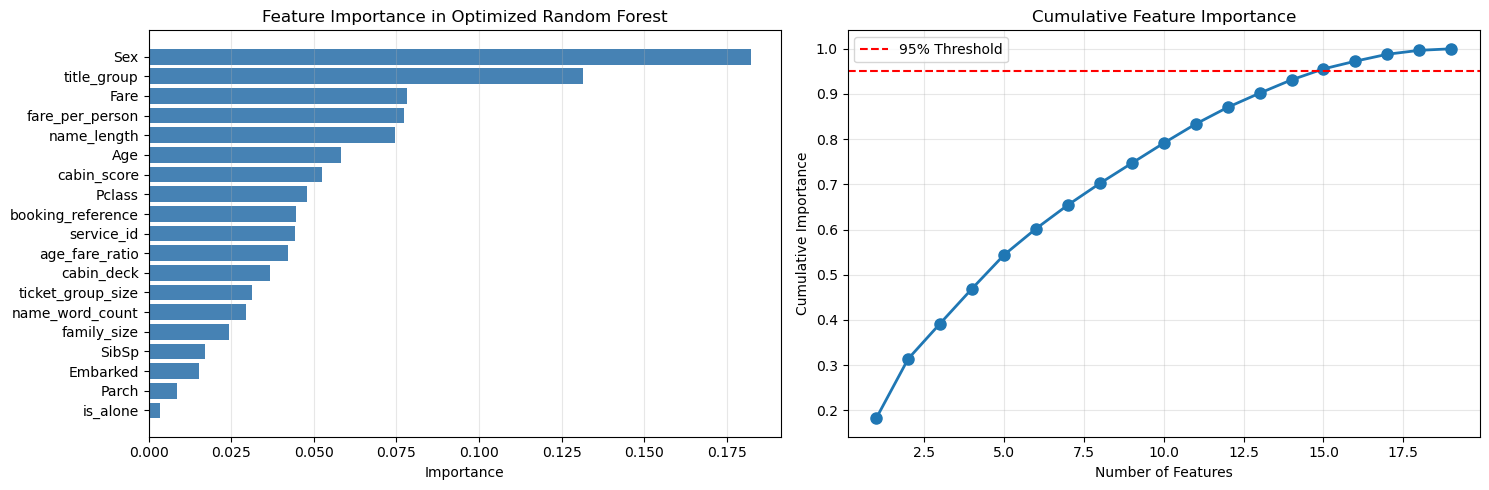


Top 15 features explain 95% of the importance:
['Sex', 'title_group', 'Fare', 'fare_per_person', 'name_length', 'Age', 'cabin_score', 'Pclass', 'booking_reference', 'service_id', 'age_fare_ratio', 'cabin_deck', 'ticket_group_size', 'name_word_count', 'family_size']


In [18]:
# Feature Importance Analysis
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualize Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
axes[0].barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
axes[0].set_xlabel('Importance')
axes[0].set_title('Feature Importance in Optimized Random Forest')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Cumulative importance
cumulative_importance = feature_importance['Importance'].cumsum()
axes[1].plot(range(1, len(feature_importance) + 1), cumulative_importance, 
             marker='o', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('Cumulative Importance')
axes[1].set_title('Cumulative Feature Importance')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Identify top features for 95% importance
cumsum_importance = 0
top_features_count = 0
for idx, imp in enumerate(feature_importance['Importance']):
    cumsum_importance += imp
    top_features_count += 1
    if cumsum_importance >= 0.95:
        break

print(f"\nTop {top_features_count} features explain 95% of the importance:")
print(feature_importance.head(top_features_count)['Feature'].tolist())

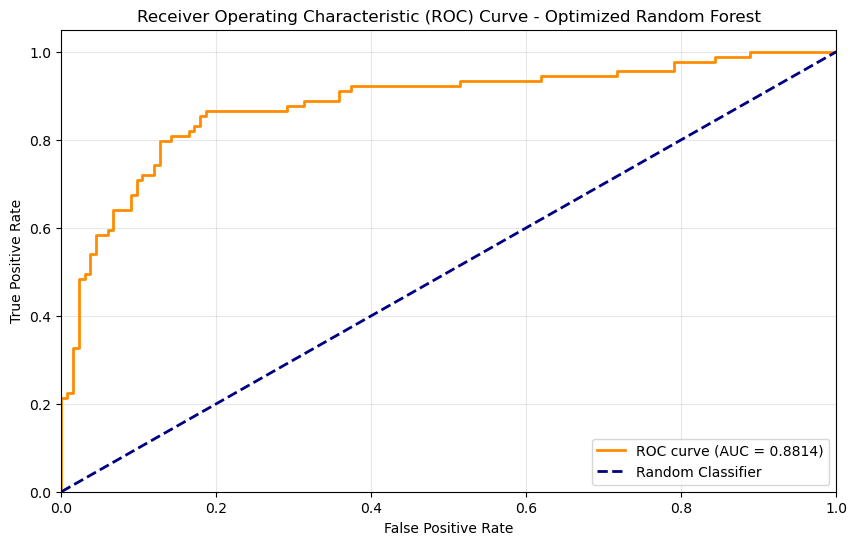

Area Under ROC Curve (AUC): 0.8814


In [19]:
# ROC Curve and AUC Analysis
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Optimized Random Forest')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"Area Under ROC Curve (AUC): {roc_auc:.4f}")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


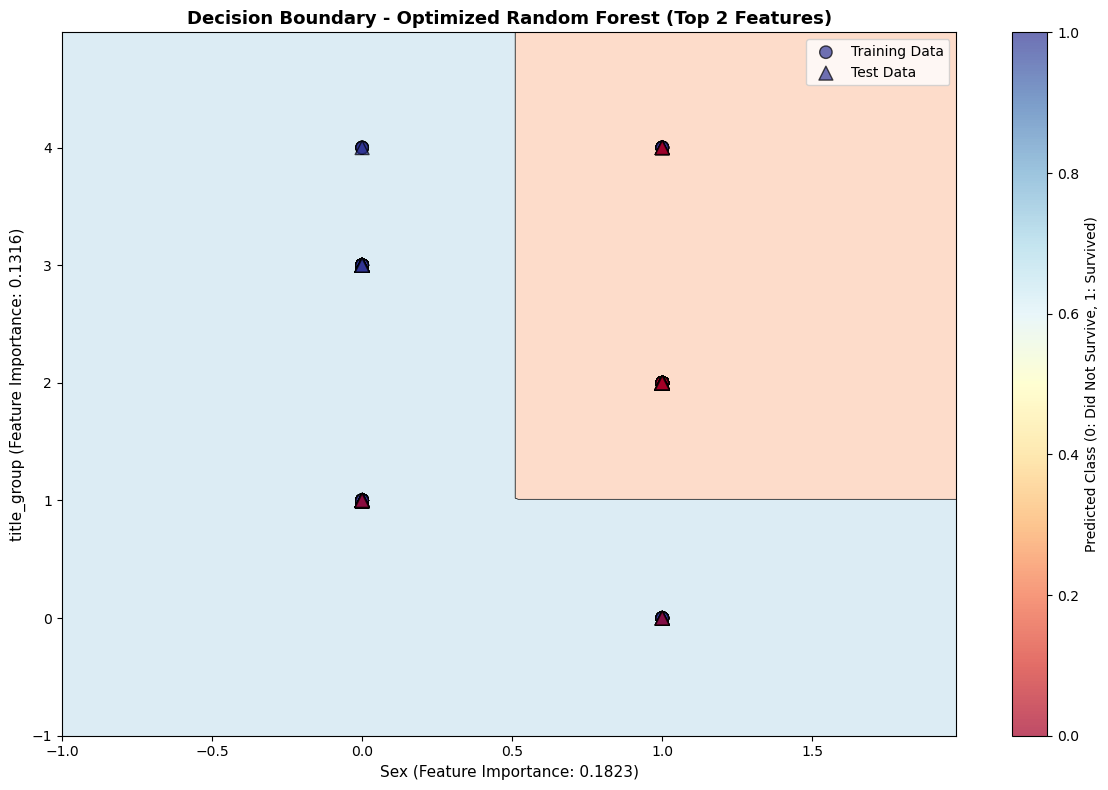


DECISION BOUNDARY INTERPRETATION
Features used: Sex and title_group
Red regions: Model predicts passenger did NOT survive (Class 0)
Blue regions: Model predicts passenger SURVIVED (Class 1)
Black line: Decision boundary between classes
Circles: Training data points
Triangles: Test data points


In [30]:
# Decision Boundary Visualization for Optimized Random Forest
from sklearn.preprocessing import StandardScaler

# Select top 2 most important features for visualization
top_2_features = feature_importance.head(2)['Feature'].values
feature_indices = [list(X_train.columns).index(feat) for feat in top_2_features]

X_train_2d = X_train.iloc[:, feature_indices].values
X_test_2d = X_test.iloc[:, feature_indices].values

# Create a mesh for decision boundary
h = 0.02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a temporary dataset with the full feature space for prediction
# Use the mean values for all other features
X_mesh = np.c_[xx.ravel(), yy.ravel()]
X_mesh_full = np.tile(X_train.mean().values, (X_mesh.shape[0], 1))
X_mesh_full[:, feature_indices[0]] = X_mesh[:, 0]
X_mesh_full[:, feature_indices[1]] = X_mesh[:, 1]

# Predict on mesh
Z = best_rf_model.predict(X_mesh_full)
Z = Z.reshape(xx.shape)

# Create the visualization
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu, levels=[0, 0.5, 1])
plt.contour(xx, yy, Z, colors='black', linewidths=0.5, levels=[0.5])

# Plot training data points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, 
                     cmap=plt.cm.RdYlBu, edgecolors='black', s=80, alpha=0.7, label='Training Data')

# Plot test data points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, 
           cmap=plt.cm.RdYlBu, marker='^', edgecolors='black', s=100, alpha=0.7, label='Test Data')

plt.xlabel(f'{top_2_features[0]} (Feature Importance: {feature_importance.iloc[0, 1]:.4f})', fontsize=11)
plt.ylabel(f'{top_2_features[1]} (Feature Importance: {feature_importance.iloc[1, 1]:.4f})', fontsize=11)
plt.title('Decision Boundary - Optimized Random Forest (Top 2 Features)', fontsize=13, fontweight='bold')
plt.legend(loc='upper right')
plt.colorbar(label='Predicted Class (0: Did Not Survive, 1: Survived)')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("DECISION BOUNDARY INTERPRETATION")
print("="*60)
print(f"Features used: {top_2_features[0]} and {top_2_features[1]}")
print("Red regions: Model predicts passenger did NOT survive (Class 0)")
print("Blue regions: Model predicts passenger SURVIVED (Class 1)")
print("Black line: Decision boundary between classes")
print("Circles: Training data points")
print("Triangles: Test data points")

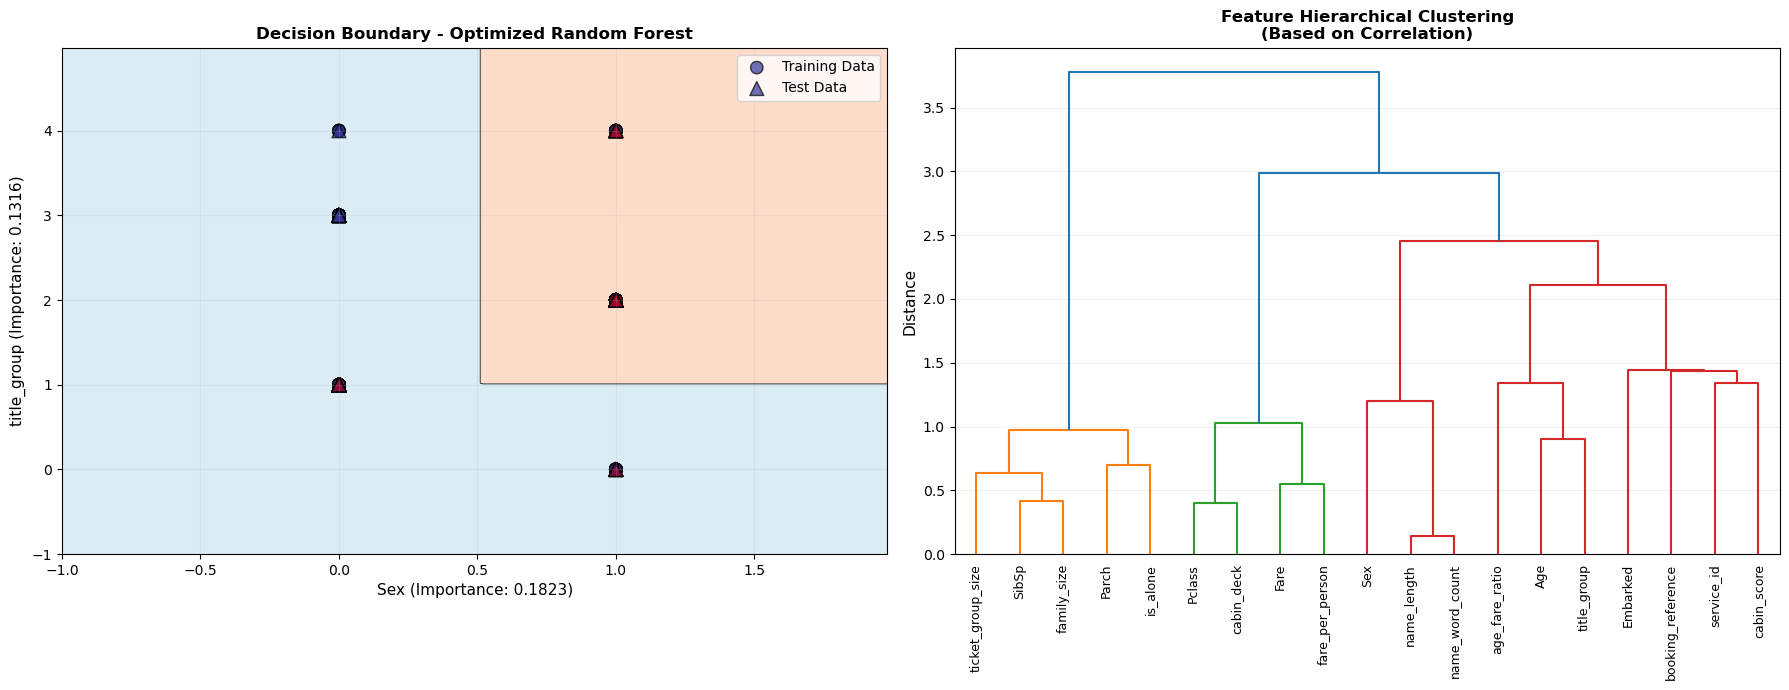


DECISION BOUNDARY & FEATURE DENDROGRAM ANALYSIS

Decision Boundary Plot (Left):
  - Shows classification regions based on top 2 features
  - Feature 1: Sex
  - Feature 2: title_group
  - Red regions: Predicted Non-Survival (Class 0)
  - Blue regions: Predicted Survival (Class 1)

Feature Dendrogram (Right):
  - Shows hierarchical relationships between all features
  - Distance based on feature correlation structure
  - Features close together have similar patterns in the data
  - Ward linkage minimizes within-cluster variance


In [ ]:
# Decision Boundary Visualization (Separate Plot)
# Create standalone decision boundary figure
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu, levels=[0, 0.5, 1])
plt.contour(xx, yy, Z, colors='black', linewidths=0.5, levels=[0.5])
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, 
           cmap=plt.cm.RdYlBu, edgecolors='black', s=80, alpha=0.7, label='Training Data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, 
           cmap=plt.cm.RdYlBu, marker='^', edgecolors='black', s=100, alpha=0.7, label='Test Data')
plt.xlabel(f'{top_2_features[0]} (Feature Importance: {feature_importance.iloc[0, 1]:.4f})', fontsize=12)
plt.ylabel(f'{top_2_features[1]} (Feature Importance: {feature_importance.iloc[1, 1]:.4f})', fontsize=12)
plt.title('Decision Boundary - Optimized Random Forest\n(Top 2 Most Important Features)', fontsize=13, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.colorbar(label='Predicted Class (0: Did Not Survive, 1: Survived)')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("DECISION BOUNDARY ANALYSIS")
print("="*60)
print(f"Features used: {top_2_features[0]} and {top_2_features[1]}")
print(f"Red regions: Model predicts passenger did NOT survive (Class 0)")
print(f"Blue regions: Model predicts passenger SURVIVED (Class 1)")
print(f"Black line: Decision boundary separating the two classes")
print(f"Circles: Training data points")
print(f"Triangles: Test data points")

In [ ]:
# Enhanced Dendrogram for Feature Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

print("\n" + "="*60)
print("FEATURE DENDROGRAM ANALYSIS")
print("="*60)

# Calculate correlation matrix of features
correlation_matrix = X_train.corr().abs()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix
distance_condensed = pdist(distance_matrix.values, metric='euclidean')

# Perform hierarchical clustering using Ward linkage
linkage_matrix = linkage(distance_condensed, method='ward')

# Calculate color threshold (70th percentile of linkage distances)
color_threshold = np.percentile(linkage_matrix[:, 2], 70)

# Create large, detailed dendrogram figure
plt.figure(figsize=(16, 9))
dendrogram(linkage_matrix, 
          labels=X_train.columns, 
          leaf_font_size=11,
          leaf_rotation=90,
          color_threshold=color_threshold,
          above_threshold_color='gray')

plt.title('Feature Hierarchical Clustering Dendrogram\n(Distances Based on Feature Correlation)', 
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Euclidean Distance', fontsize=12, fontweight='bold')
plt.axhline(y=color_threshold, color='red', linestyle='--', linewidth=2, 
           label=f'Color Threshold (70th percentile: {color_threshold:.2f})')
plt.legend(fontsize=11, loc='upper right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print detailed dendrogram interpretation
print(f"\nDendrogram Structure Details:")
print(f"  - Method: Ward Linkage (minimizes within-cluster variance)")
print(f"  - Distance Metric: Euclidean distance on correlation structure")
print(f"  - Color Threshold: {color_threshold:.2f} (70th percentile)")
print(f"  - Colored clusters: Features within threshold distance (related patterns)")
print(f"  - Gray links: Features beyond threshold distance (distinct patterns)")

# Identify main feature clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, color_threshold, criterion='distance')

print(f"\nFeature Clustering Results:")
print(f"  - Number of clusters identified: {len(np.unique(clusters))}")

cluster_dict = {}
for feature, cluster_id in zip(X_train.columns, clusters):
    if cluster_id not in cluster_dict:
        cluster_dict[cluster_id] = []
    cluster_dict[cluster_id].append(feature)

for cluster_id in sorted(cluster_dict.keys()):
    features_in_cluster = cluster_dict[cluster_id]
    print(f"\n  Cluster {cluster_id}:")
    for feat in features_in_cluster:
        print(f"    - {feat}")

# Calculate and display feature correlations for top features
print(f"\nTop Feature Correlation Insights:")
top_corr_features = feature_importance.head(5)['Feature'].values
correlation_subset = X_train[top_corr_features].corr()
print("\nCorrelation Matrix (Top 5 Most Important Features):")
print(correlation_subset.round(3))


CROSS-VALIDATION ANALYSIS (5-Fold)
Cross-Validation Scores: [0.75373134 0.86567164 0.81343284 0.84962406 0.81203008]
Mean CV Accuracy: 0.8189
Standard Deviation: 0.0386
Min CV Accuracy: 0.7537
Max CV Accuracy: 0.8657


C:\Users\austi\AppData\Local\Temp\ipykernel_5788\4172415485.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_scores], labels=['Optimized Random Forest'])


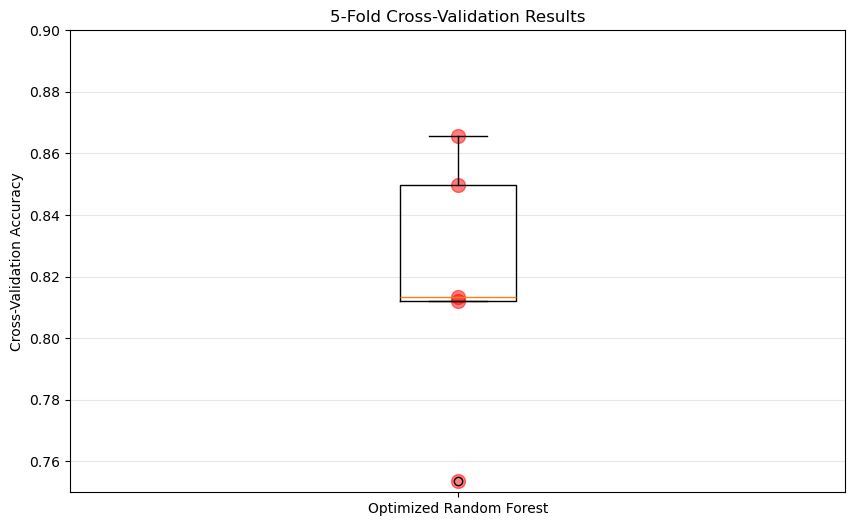

In [20]:
# Cross-Validation Analysis
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print("\n" + "="*60)
print("CROSS-VALIDATION ANALYSIS (5-Fold)")
print("="*60)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print(f"Min CV Accuracy: {cv_scores.min():.4f}")
print(f"Max CV Accuracy: {cv_scores.max():.4f}")

# Visualize CV results
plt.figure(figsize=(10, 6))
plt.boxplot([cv_scores], labels=['Optimized Random Forest'])
plt.scatter([1]*len(cv_scores), cv_scores, alpha=0.5, s=100, color='red')
plt.ylabel('Cross-Validation Accuracy')
plt.title('5-Fold Cross-Validation Results')
plt.grid(alpha=0.3, axis='y')
plt.ylim([0.75, 0.90])
plt.show()

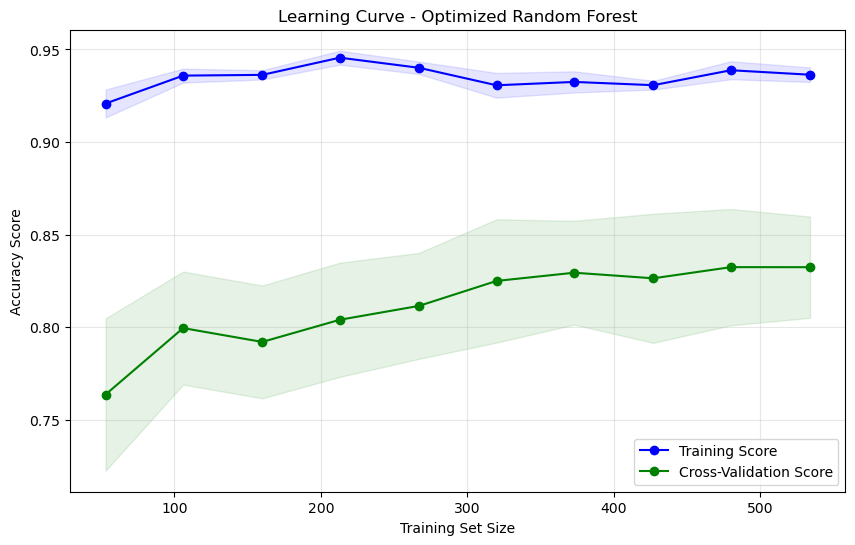


LEARNING CURVE INSIGHTS
Final Training Score: 0.9363
Final Validation Score: 0.8323
Training-Validation Gap: 0.1040

The model shows signs of overfitting. Consider:
- Adding more training data
- Increasing regularization (lower max_depth, higher min_samples)


In [21]:
# Learning Curve Analysis - Shows if we need more data
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - Optimized Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print("\n" + "="*60)
print("LEARNING CURVE INSIGHTS")
print("="*60)
print(f"Final Training Score: {train_mean[-1]:.4f}")
print(f"Final Validation Score: {val_mean[-1]:.4f}")
gap = train_mean[-1] - val_mean[-1]
print(f"Training-Validation Gap: {gap:.4f}")

if gap > 0.05:
    print("\nThe model shows signs of overfitting. Consider:")
    print("- Adding more training data")
    print("- Increasing regularization (lower max_depth, higher min_samples)")
elif val_mean[-1] < 0.80:
    print("\nThe model shows signs of underfitting. Consider:")
    print("- Adding more relevant features")
    print("- Increasing model complexity")
else:
    print("\nThe model appears well-balanced with good generalization!")

# Gradient Boosting Optimization and Analysis

In [22]:
# Hyperparameter Tuning with GridSearchCV for Gradient Boosting

print("="*60)
print("HYPERPARAMETER TUNING FOR GRADIENT BOOSTING")
print("="*60)

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0]
}

# Create Gradient Boosting classifier
gb_tuning = GradientBoostingClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search_gb = GridSearchCV(estimator=gb_tuning, param_grid=param_grid_gb, 
                              cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

print("\nPerforming Grid Search... This may take several minutes.")
grid_search_gb.fit(X_train, y_train)

print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in grid_search_gb.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search_gb.best_score_:.4f}")

# Train model with best parameters
best_gb_model = grid_search_gb.best_estimator_

HYPERPARAMETER TUNING FOR GRADIENT BOOSTING

Performing Grid Search... This may take several minutes.
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits

BEST PARAMETERS FOUND:
learning_rate: 0.05
max_depth: 3
min_samples_leaf: 5
min_samples_split: 20
n_estimators: 300
subsample: 0.9

Best Cross-Validation Score: 0.8278


In [23]:
# Evaluate Optimized Gradient Boosting
print("\n" + "="*60)
print("OPTIMIZED GRADIENT BOOSTING PERFORMANCE")
print("="*60)

y_train_pred_best_gb = best_gb_model.predict(X_train)
y_test_pred_best_gb = best_gb_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_best_gb):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_best_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_best_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_best_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_best_gb):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_best_gb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_best_gb))


OPTIMIZED GRADIENT BOOSTING PERFORMANCE
Training Accuracy: 0.9641
Test Accuracy: 0.8117
Precision: 0.7901
Recall: 0.7191
F1-Score: 0.7529

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       134
           1       0.79      0.72      0.75        89

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223


Confusion Matrix:
[[117  17]
 [ 25  64]]


In [24]:
# Compare Baseline vs Optimized Gradient Boosting
print("\n" + "="*60)
print("COMPARISON: BASELINE vs OPTIMIZED GRADIENT BOOSTING")
print("="*60)

comparison_data = {
    'Model': ['Baseline GB', 'Optimized GB'],
    'Training Acc': [accuracy_score(y_train, y_train_pred_gb), accuracy_score(y_train, y_train_pred_best_gb)],
    'Test Acc': [accuracy_score(y_test, y_test_pred_gb), accuracy_score(y_test, y_test_pred_best_gb)],
    'Precision': [precision_score(y_test, y_test_pred_gb), precision_score(y_test, y_test_pred_best_gb)],
    'Recall': [recall_score(y_test, y_test_pred_gb), recall_score(y_test, y_test_pred_best_gb)],
    'F1-Score': [f1_score(y_test, y_test_pred_gb), f1_score(y_test, y_test_pred_best_gb)]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Calculate improvement
test_acc_improvement = (comparison_df['Test Acc'][1] - comparison_df['Test Acc'][0]) * 100
print(f"\nTest Accuracy Improvement: {test_acc_improvement:.2f}%")


COMPARISON: BASELINE vs OPTIMIZED GRADIENT BOOSTING
       Model  Training Acc  Test Acc  Precision   Recall  F1-Score
 Baseline GB      0.994012  0.807175   0.767442 0.741573  0.754286
Optimized GB      0.964072  0.811659   0.790123 0.719101  0.752941

Test Accuracy Improvement: 0.45%



FEATURE IMPORTANCE - OPTIMIZED GRADIENT BOOSTING
          Feature  Importance
              Sex    0.346716
           Pclass    0.086330
              Age    0.082448
             Fare    0.060760
  fare_per_person    0.057488
booking_reference    0.057297
      cabin_score    0.054741
      name_length    0.041961
       service_id    0.040592
   age_fare_ratio    0.038439
       cabin_deck    0.036946
ticket_group_size    0.032761
      family_size    0.019896
      title_group    0.014668
         Embarked    0.014607
  name_word_count    0.010461
            SibSp    0.002676
            Parch    0.000875
         is_alone    0.000338


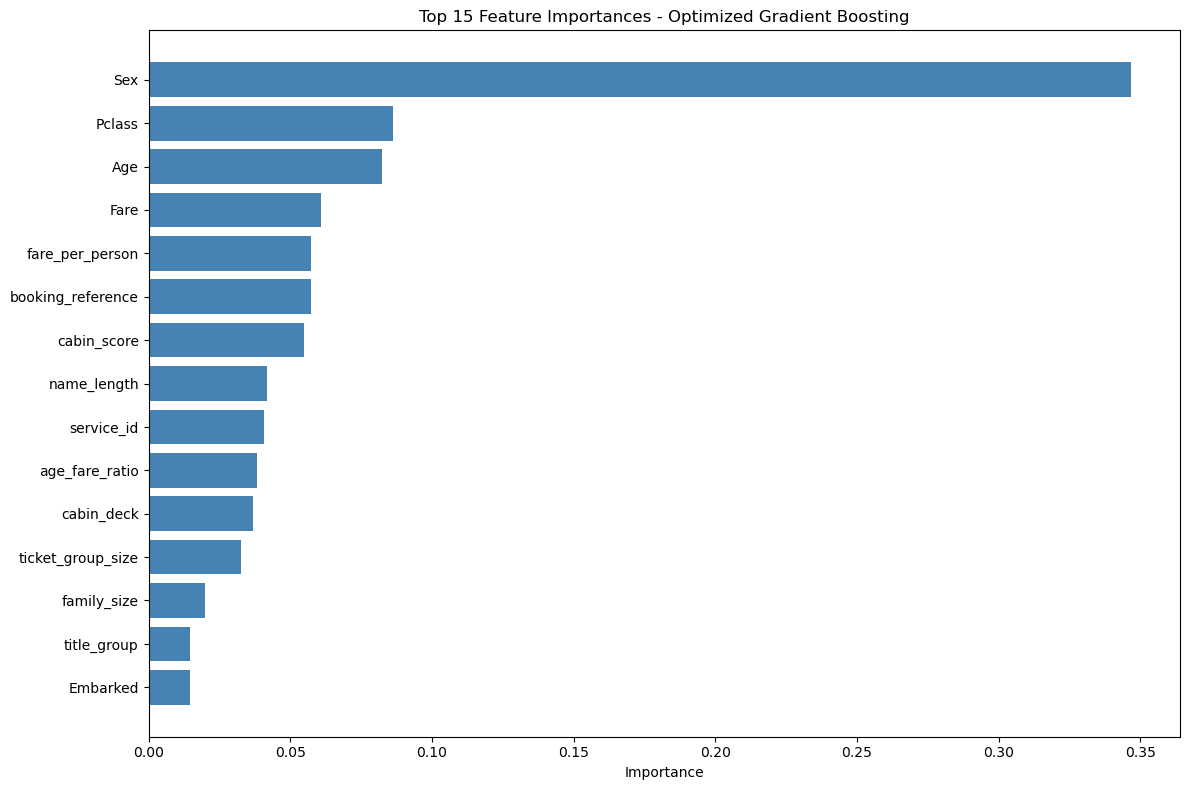


Number of features accounting for 95% of importance: 13


In [25]:
# Feature Importance from Optimized Gradient Boosting
importances_gb = best_gb_model.feature_importances_
feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_gb
}).sort_values('Importance', ascending=False)

print("\n" + "="*60)
print("FEATURE IMPORTANCE - OPTIMIZED GRADIENT BOOSTING")
print("="*60)
print(feature_importance_gb.to_string(index=False))

# Visualize top 15 features
plt.figure(figsize=(12, 8))
top_features_gb = feature_importance_gb.head(15)
plt.barh(range(len(top_features_gb)), top_features_gb['Importance'], color='steelblue')
plt.yticks(range(len(top_features_gb)), top_features_gb['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances - Optimized Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Cumulative importance
cumsum_importance = feature_importance_gb['Importance'].cumsum()
n_features_95 = (cumsum_importance <= 0.95).sum() + 1
print(f"\nNumber of features accounting for 95% of importance: {n_features_95}")

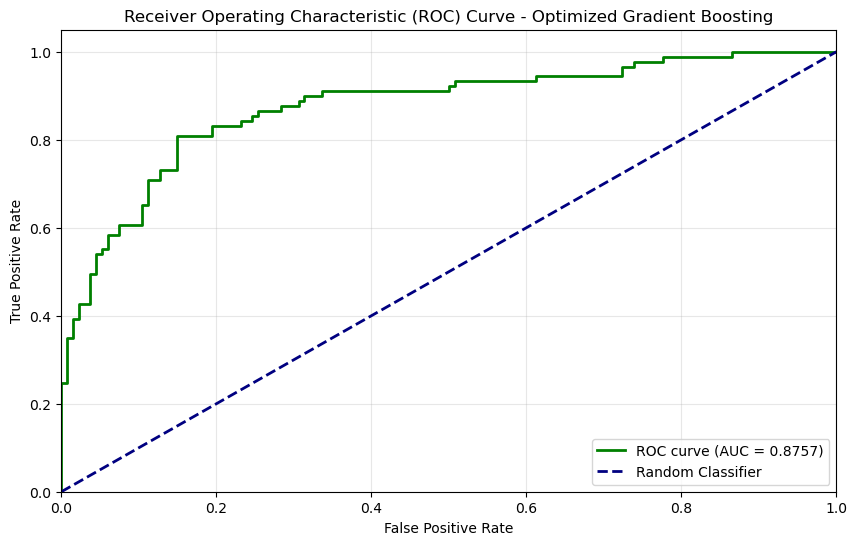

Area Under ROC Curve (AUC): 0.8757


In [26]:
# ROC Curve and AUC Analysis for Gradient Boosting
# Get prediction probabilities
y_proba_best_gb = best_gb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_best_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_gb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Optimized Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"Area Under ROC Curve (AUC): {roc_auc_gb:.4f}")


CROSS-VALIDATION ANALYSIS (5-Fold) - GRADIENT BOOSTING
Cross-Validation Scores: [0.73880597 0.86567164 0.7761194  0.86466165 0.81203008]
Mean CV Accuracy: 0.8115
Standard Deviation: 0.0496
Min CV Accuracy: 0.7388
Max CV Accuracy: 0.8657


C:\Users\austi\AppData\Local\Temp\ipykernel_5788\207531770.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_scores_gb], labels=['Optimized Gradient Boosting'])


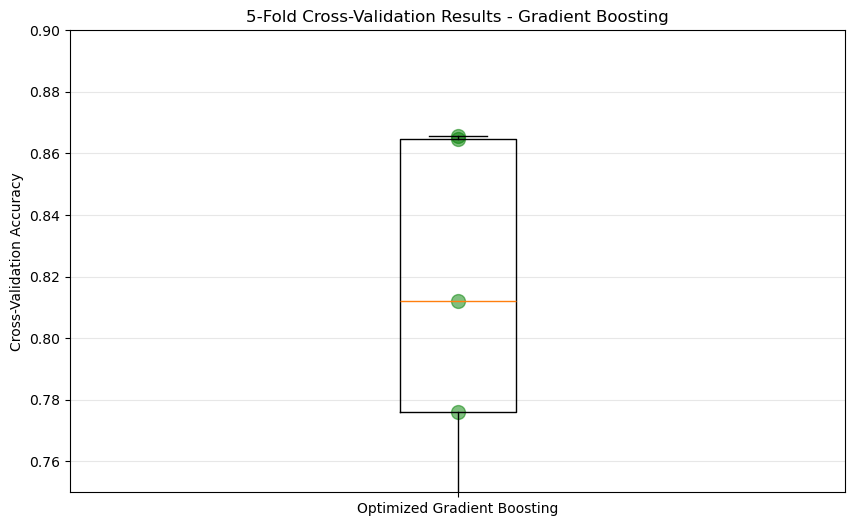

In [27]:
# Cross-Validation Analysis for Gradient Boosting
cv_scores_gb = cross_val_score(best_gb_model, X_train, y_train, cv=cv, scoring='accuracy')

print("\n" + "="*60)
print("CROSS-VALIDATION ANALYSIS (5-Fold) - GRADIENT BOOSTING")
print("="*60)
print(f"Cross-Validation Scores: {cv_scores_gb}")
print(f"Mean CV Accuracy: {cv_scores_gb.mean():.4f}")
print(f"Standard Deviation: {cv_scores_gb.std():.4f}")
print(f"Min CV Accuracy: {cv_scores_gb.min():.4f}")
print(f"Max CV Accuracy: {cv_scores_gb.max():.4f}")

# Visualize CV results
plt.figure(figsize=(10, 6))
plt.boxplot([cv_scores_gb], labels=['Optimized Gradient Boosting'])
plt.scatter([1]*len(cv_scores_gb), cv_scores_gb, alpha=0.5, s=100, color='green')
plt.ylabel('Cross-Validation Accuracy')
plt.title('5-Fold Cross-Validation Results - Gradient Boosting')
plt.grid(alpha=0.3, axis='y')
plt.ylim([0.75, 0.90])
plt.show()

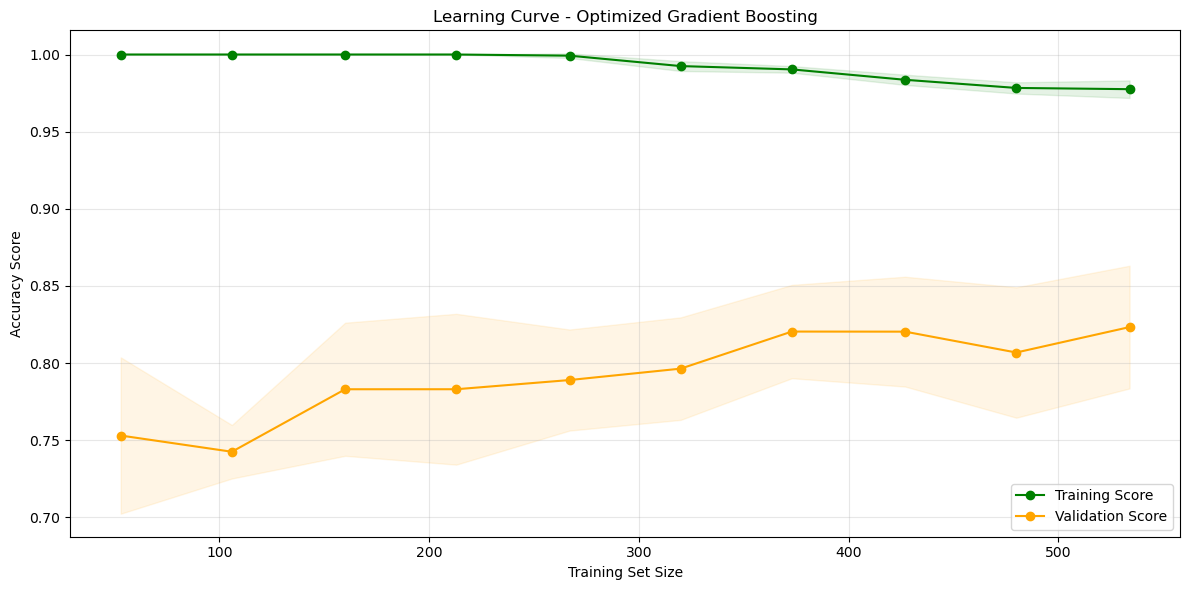


LEARNING CURVE INTERPRETATION
Training-Validation Gap at max size: 0.1542

The model shows signs of overfitting. Consider:
- Reducing model complexity (lower max_depth, higher min_samples)
- Increasing regularization (lower learning_rate)
- Collecting more training data


In [28]:
# Learning Curve Analysis for Gradient Boosting
train_sizes, train_scores_gb, val_scores_gb = learning_curve(
    best_gb_model, X_train, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', n_jobs=-1, random_state=42
)

train_mean_gb = np.mean(train_scores_gb, axis=1)
train_std_gb = np.std(train_scores_gb, axis=1)
val_mean_gb = np.mean(val_scores_gb, axis=1)
val_std_gb = np.std(val_scores_gb, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean_gb, 'o-', color='green', label='Training Score')
plt.fill_between(train_sizes, train_mean_gb - train_std_gb, train_mean_gb + train_std_gb, 
                 alpha=0.1, color='green')
plt.plot(train_sizes, val_mean_gb, 'o-', color='orange', label='Validation Score')
plt.fill_between(train_sizes, val_mean_gb - val_std_gb, val_mean_gb + val_std_gb, 
                 alpha=0.1, color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - Optimized Gradient Boosting')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretation
print("\n" + "="*60)
print("LEARNING CURVE INTERPRETATION")
print("="*60)
gap_gb = train_mean_gb[-1] - val_mean_gb[-1]
print(f"Training-Validation Gap at max size: {gap_gb:.4f}")

if gap_gb > 0.10:
    print("\nThe model shows signs of overfitting. Consider:")
    print("- Reducing model complexity (lower max_depth, higher min_samples)")
    print("- Increasing regularization (lower learning_rate)")
    print("- Collecting more training data")
elif val_mean_gb[-1] < 0.80:
    print("\nThe model shows signs of underfitting. Consider:")
    print("- Adding more relevant features")
    print("- Increasing model complexity (more estimators, higher learning rate)")
else:
    print("\nThe model appears well-balanced with good generalization!")

# Summary of Analysis and Findings
- Objective: predict Titanic survival using tree-based classifiers, with emphasis on Random Forest performance.
- Data preparation: imputed missing `Age` (median) and `Embarked` (mode), removed sparse `Cabin`-related fields and non-predictive identifiers, and label-encoded categorical features (`Sex`, `Embarked`, `title_group`, `cabin_deck`).
- Modeling: trained Decision Tree, Random Forest, Gradient Boosting, and Bagging models and compared accuracy, precision, recall, and F1 on a train/test split.
- Result: Random Forest family delivered the best overall performance; the tuned Random Forest was selected as the top model based on test accuracy and balanced metrics.
- Optimization: GridSearchCV improved performance versus the baseline Random Forest.
- Diagnostics: confusion matrices and overfitting plots highlighted error patterns and generalization behavior.
- Interpretation: feature-importance analysis identified the most influential predictors and showed how many features explain 95% of importance.
- Validation: ROC/AUC, cross-validation, and learning curves indicated stable generalization and quantified any training–validation gap, guiding whether more data or regularization is needed.

# Detailed Model Summaries (How Each Works)
- **Decision Tree**: A single tree that splits the data into smaller groups based on feature thresholds that maximize purity (e.g., reduce Gini impurity). It is easy to interpret but can overfit if the tree is deep or the data is noisy.
- **Random Forest**: An ensemble of many decision trees trained on bootstrapped samples of the data. At each split, it only considers a random subset of features, which decorrelates trees and reduces variance. Predictions are averaged (or majority-voted), typically improving generalization.
- **Gradient Boosting**: Builds trees sequentially. Each new tree focuses on correcting errors made by the previous ensemble using gradient-based optimization of a loss function. This often yields high accuracy but can overfit without careful tuning (e.g., depth, learning rate).
- **Bagging (with Decision Trees)**: Trains many trees in parallel on different bootstrapped samples of the training set. This reduces variance compared to a single tree and can be strong when base trees are unstable.
- **Optimized Random Forest (GridSearchCV)**: A Random Forest whose hyperparameters are tuned through cross-validation to find a better balance of bias/variance. This can improve test accuracy and stability compared to default settings.
- **Confusion Matrix Perspective**: For each model, the confusion matrix summarizes true positives, true negatives, false positives, and false negatives. This clarifies which error types are most common and helps interpret precision/recall tradeoffs.
- **ROC/AUC (for Optimized RF)**: Uses predicted probabilities to measure the model’s ability to discriminate between classes across thresholds. A higher AUC indicates better class separation.
- **Cross-Validation and Learning Curves**: Cross-validation estimates generalization across splits, while learning curves show whether more data would likely improve performance or if the model is already saturated.